<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Ago26/Ago26tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = np.loadtxt("olympic100m_men.txt",delimiter=',').T

In [5]:
x=data[0]
y=data[1]

In [6]:
#normalización
x=(x-1896)/4

In [7]:
#Para X de grado n
def w(x,y,n):
  X=np.vstack((np.ones_like(x)))
  i=1
  while i<= n:
    T=x**i
    TT= np.reshape(T,(np.shape(x)[0],1))
    X=np.hstack((X, TT))
    i+=1
  XT=X.T
  inv= np.linalg.inv(np.matmul(XT,X))
  t=y
  w=np.matmul(inv,np.matmul(XT,t))
  return w

In [142]:
#Función de minimización
def PesoM(w,alph,x,y):
  for i in range(np.size(w)):
    if i==0:
      Y=w[0]
    else:
        Y+=w[i]*x**i

  for k in range(np.size(w)):
    P=[]
    Y = V(w,y,x)
    for j in range(np.size(w)):
      if j==0:
        P.append(w[0]-alph*(np.sum((Y)-y))/len(x))
      else:
        P.append(w[j]-alph*(np.sum(((Y)-y)*x**j))/len(x))
    w=P
  return w

In [143]:
M= w(x,y,2)
M

array([ 1.13401367e+01, -1.01863202e-01,  1.76242483e-03])

In [144]:
Mi = PesoM(M,.01,x,y)

In [145]:
def V(w,y,x):
  for i in range(np.size(w)):
    if i==0:
      Y=w[0]
    else:
        Y+=w[i]*x**i
  return Y

In [146]:
Yi = V(Mi,y,x)

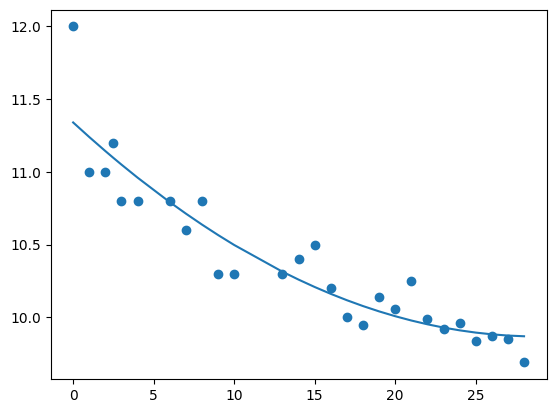

In [147]:
plt.scatter(x,y)
plt.plot(x,Yi)

In [56]:
Y = V(M,y,x)
Y

array([11.34013671, 11.24003593, 11.14346001, 11.09649386, 11.05040893,
       10.9608827 , 10.79240479, 10.71345311, 10.63802628, 10.56612431,
       10.49774718, 10.31376488, 10.25948715, 10.20873427, 10.16150624,
       10.11780306, 10.07762472, 10.04097124, 10.00784261,  9.97823882,
        9.95215989,  9.92960581,  9.91057657,  9.89507219,  9.88309265,
        9.87463796,  9.86970813])